In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import nltk
from scipy.stats import linregress
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
from IPython.display import display, HTML

In [70]:
# cs = pd.read_csv("consumer_sentiment.csv")
# cs = cs[cs["UMCSENT"] != "."]
# gp = pd.read_csv("regular_gas.csv")

          Date UMCSENT
0   1952-11-01    86.2
3   1953-02-01    90.7
9   1953-08-01    80.8
12  1953-11-01    80.7
15  1954-02-01      82


In [71]:
# cs['Date'] = pd.to_datetime(cs['Date'])
# gp['Date'] = pd.to_datetime(gp['Date'])
# cs['UMCSENT'] = pd.to_numeric(cs['UMCSENT'])
# df = pd.merge(cs, gp, on='Date', how='inner')
# df = df.sort_values('Date')
# df.to_csv('file.csv', index=False)
df = pd.read_csv("sent_and_price.csv")

        Date  UMCSENT Date_String  Retail_Price  Refining  \
0 2000-01-01    112.0      Jan-00         1.289       7.8   
1 2000-02-01    111.3      Feb-00         1.377      17.9   
2 2000-03-01    107.1      Mar-00         1.517      15.4   
3 2000-04-01    109.2      Apr-00         1.465      10.1   
4 2000-05-01    110.7      May-00         1.485      20.2   

   Distribution_and_Marketing  Taxes  Crude_Oil     Type  Year  Month  
0                        13.0   32.1       47.1  Regular  2000      1  
1                         7.5   30.1       44.6  Regular  2000      2  
2                        12.8   27.3       44.6  Regular  2000      3  
3                        20.2   28.3       41.4  Regular  2000      4  
4                         9.2   27.9       42.7  Regular  2000      5  


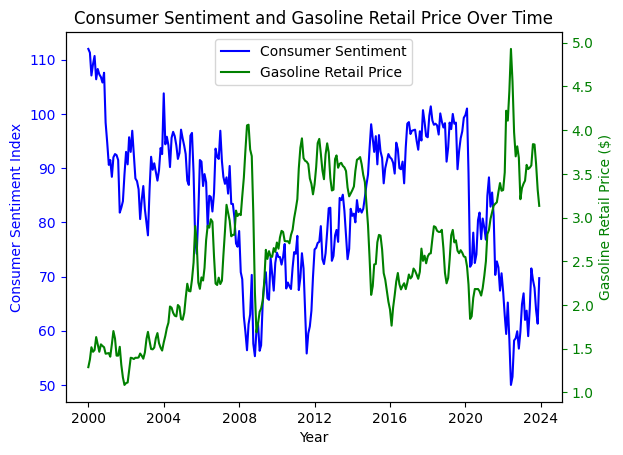

In [84]:
# plt.figure()
# print(df['Date'],df['UMCSENT'], df['Retail_Price'])
# plt.plot(df['Date'], df['UMCSENT'], label='Consumer Sentiment Index', color='blue')
# ax2 = ax1.twinx()
# plt.plot(df['Date'], df['Retail_Price'], label='Gas Price', color='red')
# plt.title('Consumer Sentiment Index and Gas Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Consumer Sentiment Index')
# # plt.ylim(0, 130)
# # plt.yticks(sorted(np.linspace(0, 130, 20), reverse=True))
# # plt.plot(df['Date'], df['UMCSENT'], label='Consumer Sentiment Index', color='blue')
# plt.legend()
# plt.xticks(rotation=45)
# # plt.tight_layout()
# plt.show()

x = df["Date"]
y1 = df["UMCSENT"]
y2=df["Retail_Price"]

# Create a figure and the first y-axis
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(x, y1, color='b', label='Consumer Sentiment')
ax1.set_xlabel('Year')
ax1.set_ylabel('Consumer Sentiment Index', color='b')
ax1.tick_params('y', colors='b')

# Create the second y-axis and plot the second set of data
ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', label='Gasoline Retail Price')
ax2.set_ylabel('Gasoline Retail Price ($)', color='g')
ax2.tick_params('y', colors='g')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

# Title
plt.title('Consumer Sentiment and Gasoline Retail Price Over Time')

# Show the plot
plt.show()


In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(y2, y1)
# print(linregress(y2,y1))
plt.figure()
plt.scatter(y2, y1, label='Consumer Sentiment Index', color='blue')


regression_line = slope * y2 + intercept
plt.plot(y2, regression_line, color='red', label='Linear Regression Line')
plt.ylabel('Customer Sentiment Index')
plt.xlabel('Gasoline Retail Price')

# Title
plt.title('Correlation Between CSI and Gasoline Retail Price')

plt.show()